<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-2/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_1108_%EC%BC%80%EB%9D%BC%EC%8A%A4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch3. 1~3

p.50-86

# [Chapter 3] 케라스(Keras)

# 1.딥러닝 준비

## 1-1. 주요 용어

### 1-1-1. 하이퍼파라미터

- 하이퍼 파라미터 : 사용자가 직접 설정해야 하는 값, 어떤 값을 설정하느냐에 따라 모델의 성능 및 결과가 달라짐

### 1-1-2. 과소적합 vs. 과대적합

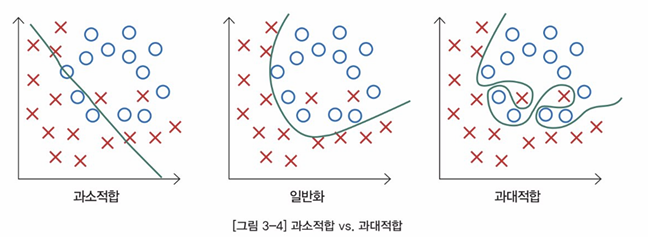

### 1-1-3. 에포크

- 에포크 : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)를 1 epoch라고 함
  - 딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾음

### 1-1-4. 손실함수

- 손실 함수(loss function) : 예측 값과 정답 값의 차이
- 지도 학습(supervised learning)
  - 이진 분류
    - 손실함수 : binary_crossentropy
    - 출력층의 활성화 함수 : sigmoid
  - 다중 분류
    - 손실함수 : categorical_crossentropy (클래스가 원핫 벡터인 경우)
    - 손실함수 : sparse_categorical_crossentropy (클래스가 레이블 값인 경우)
    - 출력층의 활성화 함수 : softmax
- 회귀 모델
  - 평균제곱오차(Mean Squared Error), 평균절대값오차(Mean Absolute Error), 후버(Huber)

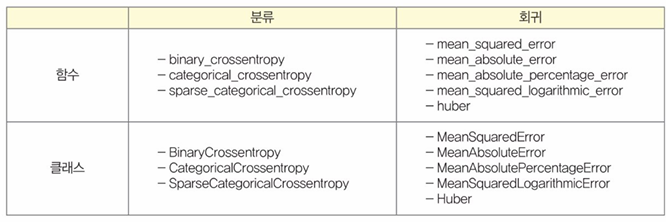

In [ ]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

### 1-1-5. 경사하강법(gradient descent)

- 경사하강법 : 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

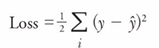

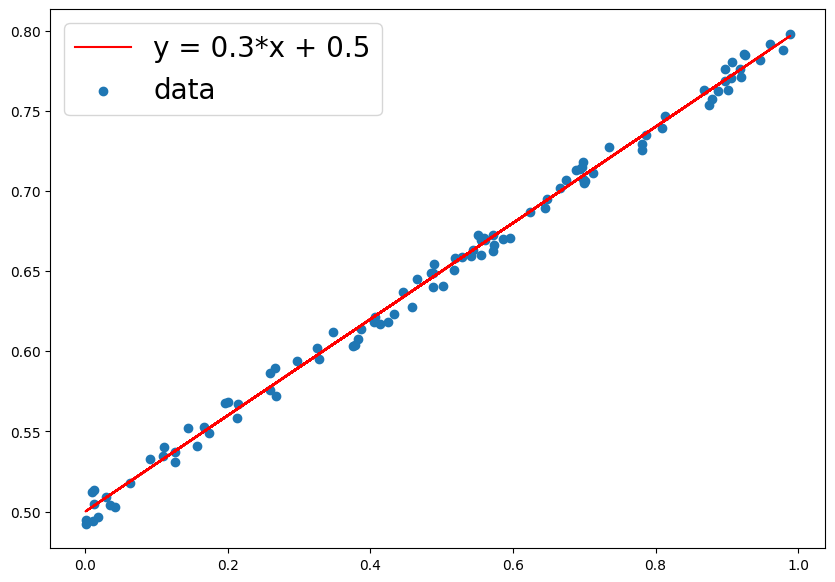

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.56978, b = 0.39090 error = 0.73725
 5 w = 0.51548, b = 0.38527 error = 0.21478
10 w = 0.48163, b = 0.40300 error = 0.15314
15 w = 0.45318, b = 0.41810 error = 0.10934
20 w = 0.42919, b = 0.43082 error = 0.07821
25 w = 0.40896, b = 0.44156 error = 0.05609
30 w = 0.39191, b = 0.45060 error = 0.04036
35 w = 0.37754, b = 0.45823 error = 0.02918
40 w = 0.36542, b = 0.46466 error = 0.02124
45 w = 0.35520, b = 0.47008 error = 0.01559
50 w = 0.34659, b = 0.47465 error = 0.01158
55 w = 0.33932, b = 0.47850 error = 0.00873
60 w = 0.33320, b = 0.48175 error = 0.00670
65 w = 0.32804, b = 0.48449 error = 0.00526
------------------------------------------------------------
67 w = 0.3, b = 0.5 error = 0.00481


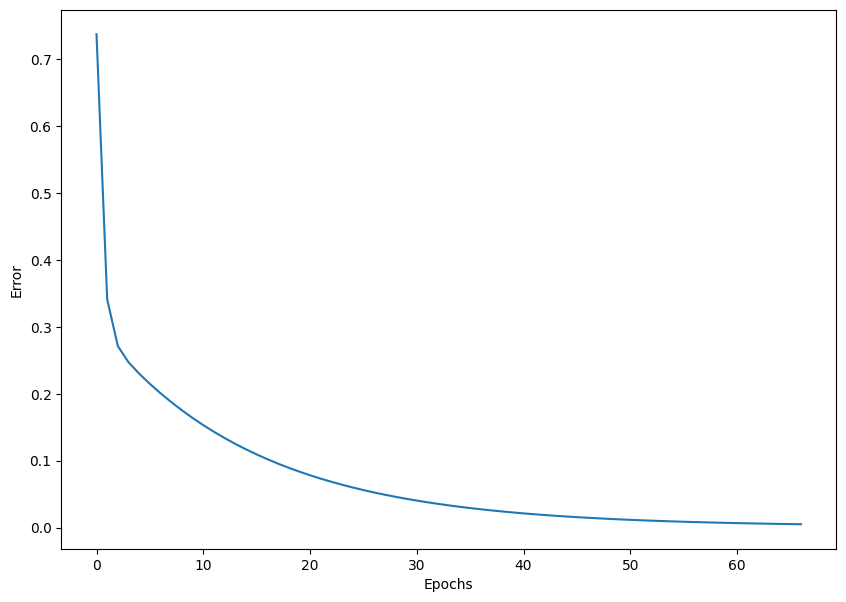

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2. 딥러닝 프로세스

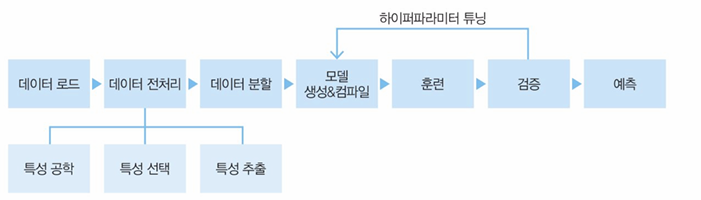

### 1-2-1. 데이터 전처리

### 1-2-2. 모델 생성

### 1-2-3. 모델 컴파일

- 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의
- 모델 인스턴스에 compile() 메소드 적용

### 1-2-4. 모델 훈련

### 1-2-5. 모델 검증

### 1-2-6. 모델 예측

# 2.단순 신경망 훈련

## 2-1. 선형회귀
- 회귀 분석 : 하나 이상의 독립변수들이 종속 변수에 미치는 영향을 추정하는 통계
기법
- 단순선형회귀(simple linear regression) : 하나의 X가 Y에 미치는 영향을 추정, 1차 함수 관계

## 2-2. 뉴런

- 뉴런 : 인공 신경망 모델을 구성하는 하나의 신경, 노드라고도 불림
- 신경망은 여러 개의 레이어, 레이어는 1개 이상의 뉴런으로 구성
- 뉴런의 내부에는 가중치가 존재하고, 모델이 훈련을 진행하며 오차 역전파를 통해 뉴런의 가중치가 업데이트
  - 역전파(back propagation) 알고리즘: 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산 후 저장

## 2-3. Dense 레이어

- Dense 레이어 : 심층 신경망 모델을 구성하는 가장 기본 레이어
- 완전 연결층(Fully Connected Layer) : 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결, Dense layer

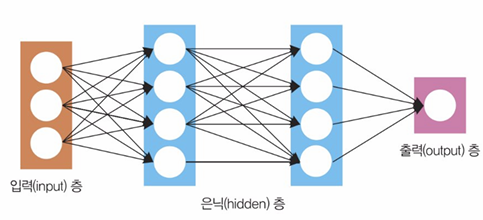

- 노드 개수 : Dense 레이어의 첫번째 위치 인자
- 활성화 함수 : activation 매개변수에 지정

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

<Dense name=dense_1, built=False>

## 2-4. 데이터셋 만들기

In [ ]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


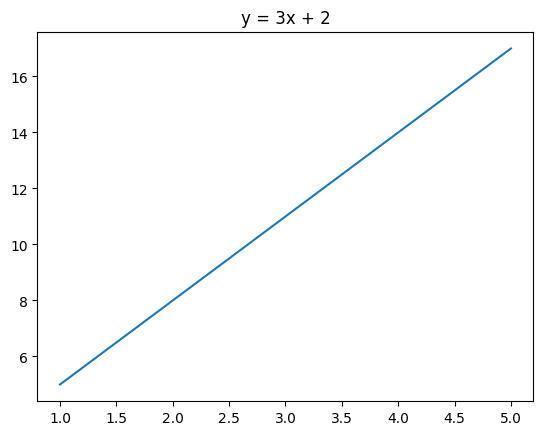

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## 2-5. Sequential API

- Sequential API : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

### 2-5-1. 모델 구조

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2. 입력 데이터 형태

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 2-5-3. 단순선형회귀 모델 정의

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

## 2-6. 모델 요약

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 2-7. 컴파일

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

## 2-8. 훈련

In [ ]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_squared_error: 0.1250
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3014 - mean_absolute_error: 0.3014 - mean_squared_error: 0.1245
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_squared_error: 0.1243
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_squared_error: 0.1242
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2954 - mean_absolute_error: 0.2954 - mean_squared_error: 0.1242


In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step - loss: 71.8369 - mae: 7.9913
Epoch 2/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 41.9979 - mae: 6.1534
Epoch 3/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 24.6083 - mae: 4.7502
Epoch 4/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.4736 - mae: 3.6788
Epoch 5/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.5667 - mae: 2.8608
Epoch 6/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 5.1236 - mae: 2.2361
Epoch 7/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.1162 - mae: 1.7591
Epoch 8/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.9455 - mae: 1.3948
Epoch 9/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2624 - mae: 1.1165
Epoch 10/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8635 - mae: 0.9039
Epoch 11/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6301 - mae: 0.7414
Epoch 12/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.4933 - mae: 0.6172
Epoch 13/1200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59m

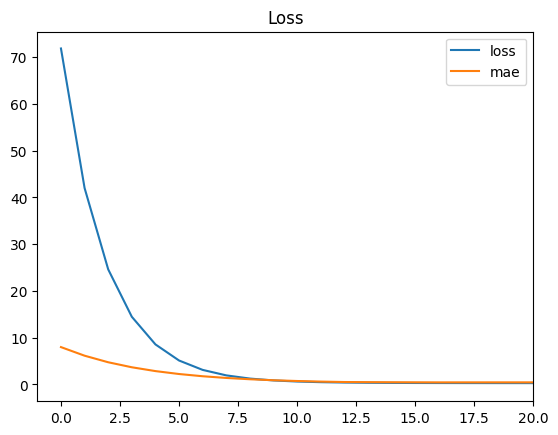

In [ ]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## 2-9. 검증

In [ ]:
# 검증
model.evaluate(x, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 9.7005e-05 - mae: 0.0085


[9.700535156298429e-05, 0.008453750982880592]

## 2-10. 예측

In [ ]:
# 예측
model.predict(np.array([10]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[32.04086]], dtype=float32)

# 3.심층 신경망으로 이미지 분류

## 3-1. 케라스 내장 데이터셋 로드

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


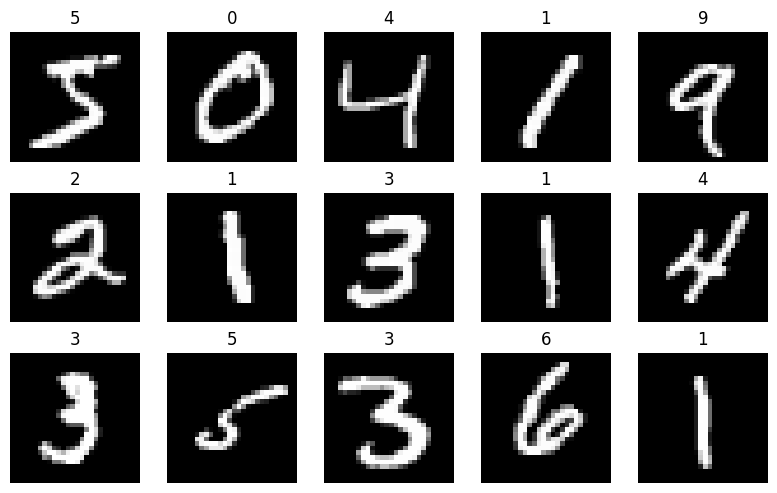

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## 3-2. 전처리

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3. Flatten 레이어

In [ ]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [ ]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## 3-4. 활성화 함수

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

<Dense name=dense_13, built=False>

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

## 3-5. 입력과 출력

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

<Dense name=dense_20, built=False>

## 3-6. 손실함수

In [ ]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

## 3-7. 옵티마이저

In [ ]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

## 3-8. 평가지표

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 3-9. 훈련

In [ ]:
# 훈련
model.fit(x_train, y_train,
          # 검증셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8657 - loss: 0.4392 - val_accuracy: 0.9590 - val_loss: 0.1299
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9709 - loss: 0.0949 - val_accuracy: 0.9700 - val_loss: 0.0956
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9805 - loss: 0.0632 - val_accuracy: 0.9751 - val_loss: 0.0795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9853 - loss: 0.0466 - val_accuracy: 0.9731 - val_loss: 0.0853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.9774 - val_loss: 0.0794
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9910 - loss: 0.0275 - val_accuracy: 0.9771 - val_loss: 0.0810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9757 - val_loss: 0.0867
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9926 - loss: 0

## 3-10. 평가

In [ ]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.1143
검증셋 정확도: 0.9771999716758728


## 3-11. 예측

In [ ]:
# 예측
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# 예측 결과 출력
predictions[0]

array([2.1778033e-12, 1.6402213e-07, 1.2344654e-07, 8.2614952e-07,
       1.1216035e-09, 1.2083894e-10, 3.2945275e-16, 9.9999875e-01,
       1.0801297e-10, 1.4562325e-07], dtype=float32)

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


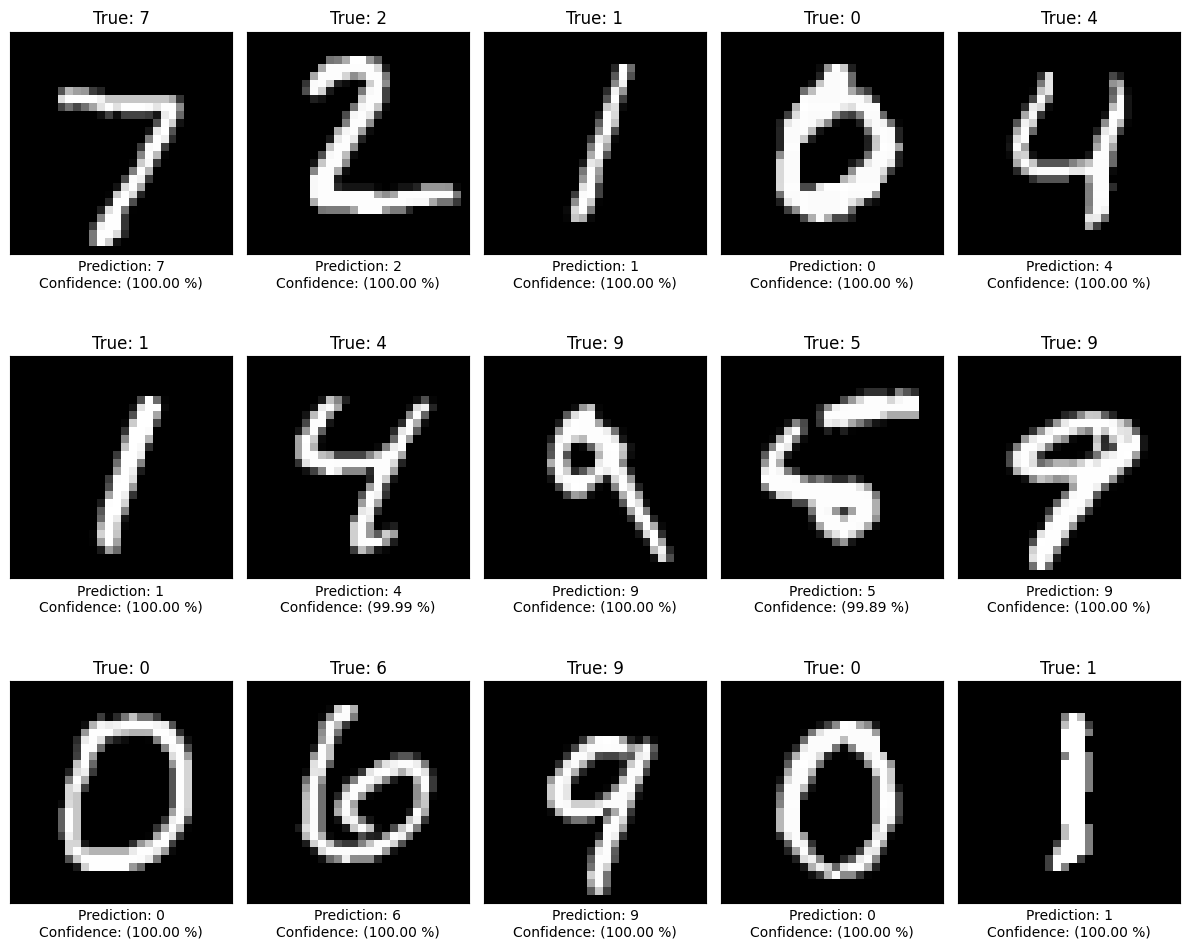

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()